## Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cooler
import scipy

## Preliminary Analysis

At first, let's take a look at the obtained data:

In [3]:
test = pd.read_csv('/gss/home/a.kuznetsov/results_corr/0A.csv')
test.loc[test.Dim == 1]

,Replica,Class,Dim,Birth,Death,Lifetime,Numvert,Range,Vertices,Unsorted_Vertices
0,0A,1,1,0.503811,0.524971,0.021160,5,4,"[13537, 13538, 13539, 13540, 13541]","[13539, 13540, 13538, 13539, 13540, 13541, 135..."
1,0A,2,1,0.529596,0.560746,0.031150,4,3,"[5565, 5566, 5567, 5568]","[5567, 5568, 5566, 5565, 5567, 5566, 5568, 5565]"
2,0A,3,1,0.553249,0.578618,0.025370,4,3,"[9095, 9096, 9097, 9098]","[9097, 9098, 9096, 9095, 9097, 9096, 9098, 9095]"
3,0A,4,1,0.574123,0.585293,0.011170,4,3,"[5330, 5331, 5332, 5333]","[5332, 5333, 5331, 5330, 5331, 5332, 5330, 5333]"
4,0A,5,1,0.586540,0.593052,0.006512,6,5,"[7132, 7133, 7134, 7135, 7136, 7137]","[7135, 7134, 7136, 7137, 7133, 7132, 7134, 713..."
...,...,...,...,...,...,...,...,...,...,...
876,0A,877,1,0.852680,inf,inf,24,88,"[14665, 14666, 14711, 14712, 14713, 14714, 147...","[14717, 14716, 14733, 14734, 14727, 14728, 147..."
877,0A,878,1,0.830543,inf,inf,14,15107,"[6, 10, 15062, 15063, 15064, 15071, 15077, 150...","[15062, 6, 15094, 15093, 15079, 15080, 15112, ..."
878,0A,879,1,0.819788,inf,inf,12,42,"[15071, 15072, 15073, 15077, 15078, 15079, 150...","[15094, 15093, 15079, 15080, 15073, 15072, 151..."
879,0A,880,1,0.816363,inf,inf,41,44,"[14296, 14297, 14298, 14299, 14300, 14302, 143...","[14316, 14317, 14329, 14328, 14311, 14310, 143..."


In [24]:
labels = ["0A", "0B", "2A", "2B", "5A", "5B", "8A", "8B"]
L = [pd.read_csv('/gss/home/a.kuznetsov/results_corr/'+name+'.csv') for name in labels]
results = pd.concat(L, ignore_index=True)

In [27]:
results['Lifetime'] = results['Death'] - results['Birth']

In [25]:
results.loc[results.Death == np.Inf, 'Death'] = 0.9
results

,Replica,Class,Dim,Birth,Death,Lifetime,Numvert,Range,Vertices,Unsorted_Vertices
0,0A,1,1,0.503811,0.524971,0.021160,5,4,"[13537, 13538, 13539, 13540, 13541]","[13539, 13540, 13538, 13539, 13540, 13541, 135..."
1,0A,2,1,0.529596,0.560746,0.031150,4,3,"[5565, 5566, 5567, 5568]","[5567, 5568, 5566, 5565, 5567, 5566, 5568, 5565]"
2,0A,3,1,0.553249,0.578618,0.025370,4,3,"[9095, 9096, 9097, 9098]","[9097, 9098, 9096, 9095, 9097, 9096, 9098, 9095]"
3,0A,4,1,0.574123,0.585293,0.011170,4,3,"[5330, 5331, 5332, 5333]","[5332, 5333, 5331, 5330, 5331, 5332, 5330, 5333]"
4,0A,5,1,0.586540,0.593052,0.006512,6,5,"[7132, 7133, 7134, 7135, 7136, 7137]","[7135, 7134, 7136, 7137, 7133, 7132, 7134, 713..."
...,...,...,...,...,...,...,...,...,...,...
8877,8B,10,2,0.861404,0.863473,0.002069,9,10,"[11374, 11375, 11376, 11377, 11378, 11381, 113...","[11376, 11383, 11374, 11378, 11382, 11374, 113..."
8878,8B,11,2,0.878021,0.880016,0.001995,8,8,"[11321, 11323, 11324, 11325, 11326, 11327, 113...","[11327, 11321, 11329, 11327, 11328, 11329, 113..."
8879,8B,12,2,0.881608,0.888460,0.006852,7,13,"[9283, 9286, 9287, 9290, 9292, 9294, 9296]","[9294, 9283, 9296, 9290, 9283, 9286, 9290, 928..."
8880,8B,13,2,0.860580,0.863762,0.003182,7,10,"[14239, 14241, 14244, 14245, 14246, 14247, 14249]","[14244, 14239, 14241, 14244, 14247, 14239, 142..."


In [38]:
results.loc[results.Dim == 1]

,Replica,Class,Dim,Birth,Death,Lifetime,Numvert,Range,Vertices,Unsorted_Vertices
0,0A,1,1,0.503811,0.524971,0.021160,5,4,"[13537, 13538, 13539, 13540, 13541]","[13539, 13540, 13538, 13539, 13540, 13541, 135..."
1,0A,2,1,0.529596,0.560746,0.031150,4,3,"[5565, 5566, 5567, 5568]","[5567, 5568, 5566, 5565, 5567, 5566, 5568, 5565]"
2,0A,3,1,0.553249,0.578618,0.025370,4,3,"[9095, 9096, 9097, 9098]","[9097, 9098, 9096, 9095, 9097, 9096, 9098, 9095]"
3,0A,4,1,0.574123,0.585293,0.011170,4,3,"[5330, 5331, 5332, 5333]","[5332, 5333, 5331, 5330, 5331, 5332, 5330, 5333]"
4,0A,5,1,0.586540,0.593052,0.006512,6,5,"[7132, 7133, 7134, 7135, 7136, 7137]","[7135, 7134, 7136, 7137, 7133, 7132, 7134, 713..."
...,...,...,...,...,...,...,...,...,...,...
8863,8B,1128,1,0.823848,0.900000,0.076152,34,43,"[14444, 14445, 14446, 14448, 14451, 14453, 144...","[14454, 14453, 14474, 14475, 14470, 14469, 144..."
8864,8B,1129,1,0.819414,0.900000,0.080586,11,11,"[8266, 8268, 8269, 8270, 8271, 8272, 8273, 827...","[8270, 8269, 8271, 8272, 8269, 8268, 8273, 827..."
8865,8B,1130,1,0.810492,0.900000,0.089508,47,62,"[4632, 4633, 4634, 4635, 4636, 4637, 4638, 463...","[4633, 4634, 4661, 4660, 4657, 4658, 4685, 468..."
8866,8B,1131,1,0.810340,0.900000,0.089660,21,61,"[14423, 14424, 14425, 14426, 14427, 14428, 144...","[14424, 14423, 14428, 14427, 14438, 14437, 144..."


Text(0.5, 1.0, 'Lifetime Distribution, log scale')

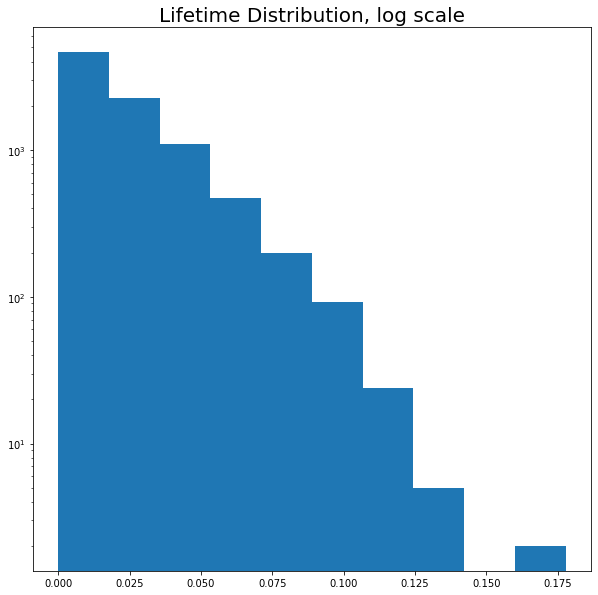

In [32]:
plt.figure(figsize = (10, 10))
plt.hist(results.loc[results.Dim == 1].Lifetime)
plt.yscale('log')
plt.title("Lifetime Distribution, log scale", fontsize=20)

In [34]:
np.percentile(results.loc[results.Dim == 1].Lifetime, 99)

0.09368774933950103

In [36]:
loops = results.loc[(results.Dim == 1) & (results.Lifetime > np.percentile(results.loc[results.Dim == 1].Lifetime, 99))]
loops = loops.sort_values('Lifetime')
loops

,Replica,Class,Dim,Birth,Death,Lifetime,Numvert,Range,Vertices,Unsorted_Vertices
2167,2A,392,1,0.788612,0.882321,0.093709,7,6,"[13571, 13572, 13573, 13574, 13575, 13576, 13577]","[13574, 13575, 13573, 13574, 13572, 13571, 135..."
8406,8B,671,1,0.801461,0.895214,0.093753,15,14,"[2723, 2724, 2725, 2726, 2727, 2728, 2729, 273...","[2729, 2730, 2736, 2737, 2727, 2728, 2733, 273..."
232,0A,233,1,0.575073,0.668872,0.093799,10,9,"[4652, 4653, 4654, 4655, 4656, 4657, 4658, 465...","[4657, 4656, 4654, 4655, 4659, 4660, 4654, 465..."
1564,0B,677,1,0.744988,0.838926,0.093938,7,9,"[131, 132, 133, 134, 135, 136, 140]","[134, 135, 134, 133, 135, 136, 132, 131, 136, ..."
4569,5A,215,1,0.747366,0.841360,0.093994,7,6,"[5355, 5356, 5357, 5358, 5359, 5360, 5361]","[5360, 5361, 5358, 5357, 5359, 5360, 5356, 535..."
...,...,...,...,...,...,...,...,...,...,...
8101,8B,366,1,0.728293,0.864989,0.136695,10,9,"[5607, 5608, 5609, 5610, 5611, 5612, 5613, 561...","[5612, 5613, 5608, 5607, 5611, 5612, 5614, 561..."
1290,0B,403,1,0.676847,0.815442,0.138595,14,14,"[1124, 1125, 1127, 1128, 1129, 1130, 1131, 113...","[1128, 1129, 1130, 1129, 1133, 1132, 1134, 113..."
6979,8A,331,1,0.721337,0.860061,0.138724,10,9,"[5614, 5615, 5616, 5617, 5618, 5619, 5620, 562...","[5619, 5620, 5615, 5614, 5618, 5619, 5621, 562..."
223,0A,224,1,0.375227,0.538950,0.163723,24,27,"[15029, 15031, 15032, 15034, 15035, 15036, 150...","[15045, 15046, 15044, 15043, 15056, 15055, 150..."


In [14]:
loops = results.loc[(results.Death != np.Inf)& (results.Dim == 1)]
loops.sort_values('Lifetime')

,Replica,Class,Dim,Birth,Death,Lifetime,Numvert,Range,Vertices
16520,5B,1204,1,0.461353,0.461354,1.890603e-07,6,5,"[2968, 2969, 2970, 2971, 2972, 2973]"
120,0A,121,1,0.444128,0.444129,1.213545e-06,5,4,"[13096, 13097, 13098, 13099, 13100]"
2472,0A,2473,1,0.473314,0.473315,1.460929e-06,6,5,"[14322, 14323, 14324, 14325, 14326, 14327]"
22478,8B,1485,1,0.498606,0.498609,3.022980e-06,4,11,"[13967, 13968, 13977, 13978]"
5671,0B,1100,1,0.470232,0.470236,3.857510e-06,6,21,"[8415, 8416, 8417, 8418, 8419, 8436]"
...,...,...,...,...,...,...,...,...,...
3365,0A,3366,1,0.394706,0.495616,1.009096e-01,16,35,"[15057, 15058, 15059, 15061, 15062, 15063, 150..."
3364,0A,3365,1,0.375474,0.476445,1.009718e-01,8,30,"[15061, 15062, 15063, 15074, 15075, 15076, 150..."
8532,0B,3961,1,0.357507,0.458567,1.010594e-01,16,65,"[15083, 15087, 15088, 15096, 15097, 15103, 151..."
8533,0B,3962,1,0.360361,0.464820,1.044588e-01,6,50,"[15097, 15112, 15113, 15114, 15115, 15147]"


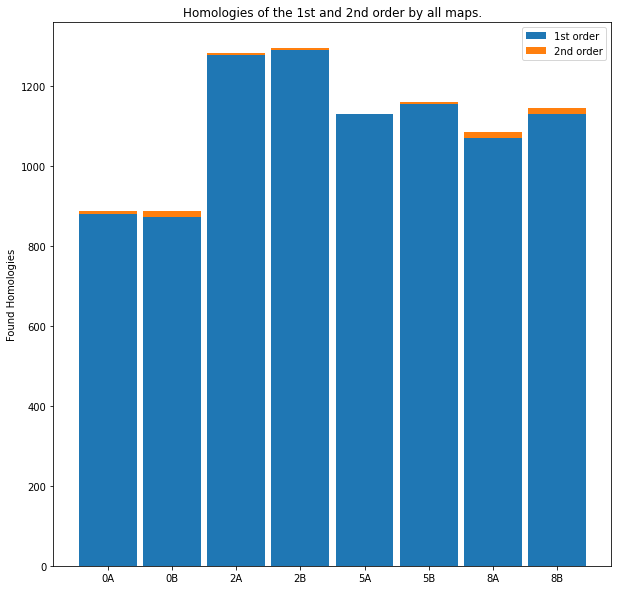

In [16]:
labels = ["0A", "0B", "2A", "2B", "5A", "5B", "8A", "8B"]
width = 0.9
first_order = results[results.Dim == 1].groupby('Replica')["Dim"].agg('count').reindex(labels, fill_value=0)
second_order = results[results.Dim == 2].groupby('Replica')["Dim"].agg('count').reindex(labels, fill_value=0)

fig, ax = plt.subplots(figsize = (10, 10))
ax.bar(labels, first_order, width,  label='1st order')
ax.bar(labels, second_order, width, bottom=first_order, label='2nd order')

ax.set_ylabel('Found Homologies')
ax.set_title('Homologies of the 1st and 2nd order by all maps.')
ax.legend()

plt.show()


Something have gone wrong with 5A replica. Let's investigate the difference between distance distributions:

#### Create the variables for all of the contacts, distances and indices:

In [10]:
all_contacts_nonbalanced = np.zeros(tuple([len(labels)]+list(cooler.Cooler("/gss/home/a.kuznetsov/data_new/2A_2000_down.cool").matrix(balance=False).shape)))
all_contacts_balanced = np.zeros(tuple([len(labels)]+list(cooler.Cooler("/gss/home/a.kuznetsov/data_new/2A_2000_down.cool").matrix(balance=False).shape)))

for i in range(len(labels)):
    x = cooler.Cooler("/gss/home/a.kuznetsov/data_new/%s_2000_down.cool" %labels[i])
    all_contacts_nonbalanced[i] = x.matrix(balance=False)[:, :]
    all_contacts_balanced[i] = x.matrix(balance=True)[:, :]
all_contacts_nonbalanced

array([[[  0.,   3.,   3., ...,   0.,   0.,   0.],
        [  3.,  11.,   4., ...,   0.,   0.,   0.],
        [  3.,   4.,   1., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0., 104.,  66.],
        [  0.,   0.,   0., ...,   0.,  66., 294.]],

       [[  2.,   6.,   2., ...,   0.,   0.,   1.],
        [  6.,  24.,   3., ...,   0.,   0.,   1.],
        [  2.,   3.,   3., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,  86.,  73.],
        [  1.,   1.,   0., ...,   0.,  73., 273.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,  11.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,  37.,  34.],
        [  0.,   0.,   0., ...,   0.,  34., 116.]],

       ...,

       [[  0.,   1.,   0

In [20]:
saved_indices = [0]*len(labels)

for i in range(len(labels)):
    saved_indices[i] = np.load('/gss/home/a.kuznetsov/DM_indices/%s_saved.npy' %labels[i])
saved_indices

[array([    7,     8,     9, ..., 17157, 17172, 17173]),
 array([    7,     8,     9, ..., 17157, 17172, 17173]),
 array([    7,     9,    10, ..., 17157, 17172, 17173]),
 array([    7,     8,     9, ..., 17157, 17172, 17173]),
 array([    7,     9,    10, ..., 17157, 17172, 17173]),
 array([    7,     9,    10, ..., 17157, 17172, 17173]),
 array([    7,     8,     9, ..., 17157, 17172, 17173]),
 array([    7,     8,     9, ..., 17157, 17172, 17173])]

In [12]:
all_distances = [0]*len(labels)
for i in range(len(labels)):
    all_distances[i] = np.load('/gss/home/a.kuznetsov/NoNAN_DM_new/%s.npy' %labels[i])
all_distances

MemoryError: Unable to allocate 1.71 GiB for an array with shape (229461904,) and data type float64

In [9]:
def mydist_balanced(B):
    B1 = np.nan_to_num(B) #Replace all NaNs with zeros;
    B1 = np.where(B1==0.0, np.unique(B1)[1]/2, B1) #Replace all zeros with the minimal nonzero value / 2;
    B1 = B1 / B1.max() if B1.max() > 1. else B1 #Now all the elements are <= 1;
    B1 = np.log10(B1) #Log-transformation: all values are <= 0;
    B1 = B1 * (-1) #Now all values are >= 0;
    B1 = B1 / B1.max() #Now all values are in the [0; 1] interval; 
    np.fill_diagonal(B1, 0.) #Zero main diagonal for subsequent topological analysis.
    return B1

Text(0.5, 1.0, 'The observed distribution of distances != 1')

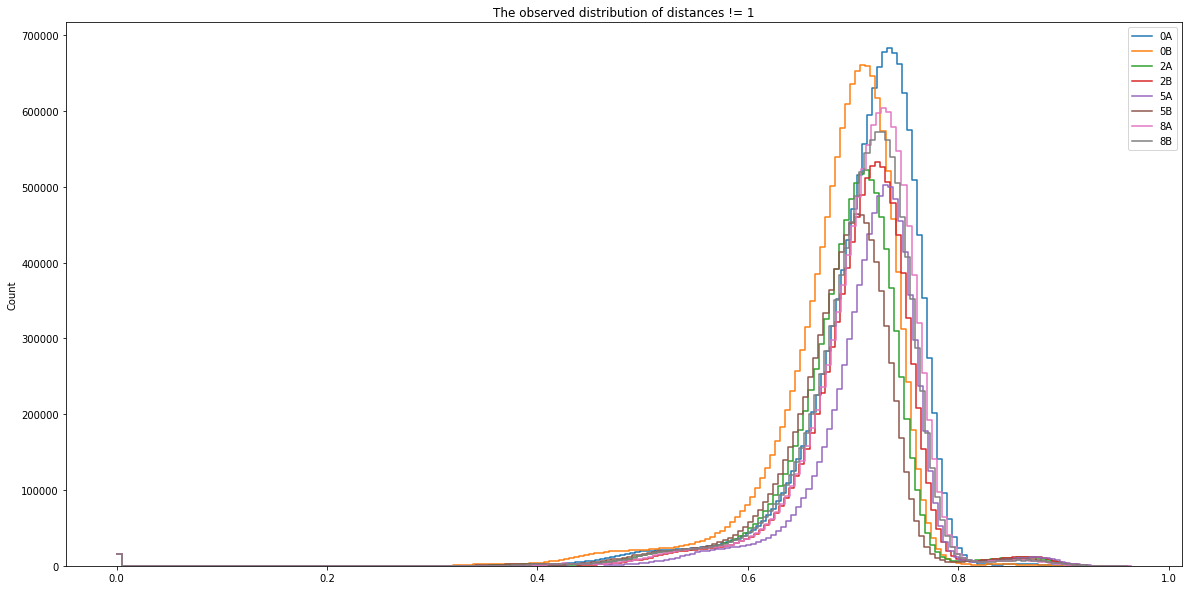

In [10]:
plt.figure(figsize = (20, 10))
for i in range(len(labels)):
    Z = all_distances[i].flatten()
    sns.histplot(Z[Z != 1], bins = 200, alpha=0.5, fill=False, element="step", label=labels[i])
plt.legend()
plt.title("The observed distribution of distances != 1")


In [11]:
X = {labels[i]:(all_distances[i][all_distances[i] == 1].shape[0] /  all_distances[i][all_distances[i] != 1].shape[0]) for i in range(len(labels))}
X

{'0A': 15.401861482219777,
 '0B': 15.21187485604715,
 '2A': 21.89890294124418,
 '2B': 21.52436663725856,
 '5A': 24.878969547579864,
 '5B': 23.635904756089783,
 '8A': 18.472400893792937,
 '8B': 18.572010474591945}

We see, that for 5A the proportion of cells with the distance = 1 is the maximal, probably that is the reason for the low number of found homologies. We may also check the hypothesis with scipy.stats command:

In [12]:
for i in range(len(labels)):
    print(labels[i], scipy.stats.describe(all_distances[i].flatten()))

0A DescribeResult(nobs=228674884, minmax=(0.0, 1.0), mean=0.9821800622106923, variance=0.0051310118702059815, skewness=-4.075130930200622, kurtosis=16.979693351067844)
0B DescribeResult(nobs=229461904, minmax=(0.0, 1.0), mean=0.9804412355712859, variance=0.00607643263215792, skewness=-3.9948500917412173, kurtosis=15.813494234797364)
2A DescribeResult(nobs=236728996, minmax=(0.0, 1.0), mean=0.9865134633681758, variance=0.004155882493179545, skewness=-4.872844835776414, kurtosis=24.56592799765028)
2B DescribeResult(nobs=236083225, minmax=(0.0, 1.0), mean=0.9868281904537114, variance=0.003904169241378068, skewness=-4.855766712684775, kurtosis=24.712760427622086)
5A DescribeResult(nobs=235100889, minmax=(0.0, 1.0), mean=0.98888986069155, variance=0.0032127867247294106, skewness=-5.280660676011523, kurtosis=30.133689467430408)
5B DescribeResult(nobs=234426721, minmax=(0.0, 1.0), mean=0.9871326481551685, variance=0.0040856085720394385, skewness=-5.080407324792974, kurtosis=26.766557506415996

Indeed, 5A has the highest mean, skewness and kurtosis, because of the proportion of cells with the distance = 1.

Probably due to maxrad=0.5 in the Eirene command it would be also useful to check the proportion of distances < 0.5:

In [18]:
for i in range(len(labels)):
    print(labels[i], np.count_nonzero(all_distances[i] < 0.5) / all_distances[i].size)

0A 0.0009023290900630784
0B 0.0015058795990815102
2A 0.0005257657579048745
2B 0.0003630880593062044
5A 0.0002287571103144574
5B 0.0006688017446611814
8A 0.0003884171508638878
8B 0.000527698018243805


We observe, that the ones with the lowest proportion (2B, 5A, 8A) have the lowest number of found homologies. If we don't take into account zero values on the main diagonal, the difference becomes even more drastic:

In [22]:
for i in range(len(labels)):
    print(labels[i], 10**4 * np.count_nonzero((all_distances[i] < 0.5) & (all_distances[i] > 0)) / all_distances[i].size)

0A 8.362002711237846
0B 14.398642835283018
2A 4.607716073784219
2B 2.9800507850568376
5A 1.6353830120991164
5B 6.034892242510187
8A 3.2300637116739384
8B 4.622829596973276


### General homologies features:

In [13]:
results[results['Replica'] != '5A'].describe()

/opt/python/lib/python3.8/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,Class,Dim,Birth,Death,Lifetime,Numvert,Range
count,23621.000000,23621.000000,23621.000000,2.362100e+04,2.362100e+04,23621.000000,23621.000000
mean,1543.612294,1.123915,0.470552,inf,inf,24.212015,541.030016
std,1142.743302,0.329492,0.024014,NaN,NaN,145.881762,2540.408743
min,1.000000,1.000000,0.331788,3.463939e-01,1.890603e-07,4.000000,3.000000
25%,571.000000,1.000000,0.457192,4.672217e-01,3.316986e-03,5.000000,5.000000
50%,1275.000000,1.000000,0.476903,4.876477e-01,9.156312e-03,7.000000,8.000000
75%,2405.000000,1.000000,0.489614,NaN,NaN,10.000000,12.000000
max,4504.000000,2.000000,0.499994,inf,inf,4047.000000,15381.000000


In [14]:
results[results['Replica'] == '5A'].describe()

,Class,Dim,Birth,Death,Lifetime,Numvert,Range
count,130.000000,130.0,130.000000,130.000000,130.000000,130.000000,130.000000
mean,65.500000,1.0,0.487010,inf,inf,7.430769,905.792308
std,37.671829,0.0,0.013364,NaN,NaN,6.805081,3501.979291
min,1.000000,1.0,0.429243,0.451283,0.000068,4.000000,3.000000
25%,33.250000,1.0,0.481294,0.498626,0.016229,4.000000,3.000000
50%,65.500000,1.0,0.491264,inf,inf,5.000000,4.000000
75%,97.750000,1.0,0.496877,inf,inf,9.000000,31.750000
max,130.000000,1.0,0.499986,inf,inf,63.000000,15327.000000


We see from the describe() output, that in the 5A replica has higher birthtime mean (0.487010 vs 0.470552) with very high minimal value (0.429243 vs 0.331788), low mean number of vertices in the homology (7.430769 vs 24.212015) and high range mean (905.792308 vs 541.030016).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd54f987c10>,
      dtype=object)

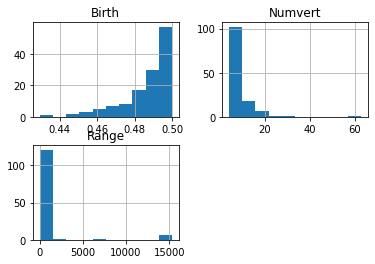

In [19]:
results.loc[results['Replica'] == '5A', ['Birth', 'Numvert', 'Range']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd54f75cd30>,
      dtype=object)

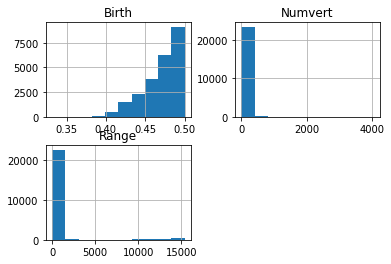

In [20]:
results.loc[results['Replica'] != '5A', ['Birth', 'Numvert', 'Range']].hist()

In [51]:
results.sort_values('Numvert')[results['Lifetime'] != float('inf')]

<ipython-input-51-2a74cb256fea>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.sort_values('Numvert')[results['Lifetime'] != float('inf')]


,Replica,Class,Dim,Birth,Death,Lifetime,Numvert,Range,Vertices
0,0A,1,1,0.370315,0.383337,0.013022,4,3,"[15079, 15080, 15081, 15082]"
16155,5B,839,1,0.431656,0.434038,0.002382,4,3,"[1876, 1877, 1878, 1879]"
16156,5B,840,1,0.431687,0.435068,0.003382,4,3,"[13989, 13990, 13991, 13992]"
16157,5B,841,1,0.432570,0.482559,0.049989,4,15252,"[5, 15247, 15256, 15257]"
16158,5B,842,1,0.432576,0.432964,0.000387,4,3,"[9771, 9772, 9773, 9774]"
...,...,...,...,...,...,...,...,...,...
8164,0B,3593,1,0.485547,0.486142,0.000595,29,28,"[3753, 3754, 3755, 3756, 3757, 3758, 3759, 376..."
8435,0B,3864,1,0.438438,0.484986,0.046548,29,33,"[14960, 14961, 14962, 14963, 14964, 14965, 149..."
8163,0B,3592,1,0.485367,0.499118,0.013751,30,30,"[3824, 3825, 3826, 3827, 3828, 3829, 3830, 383..."
8125,0B,3554,1,0.476286,0.491837,0.015551,31,34,"[5040, 5041, 5042, 5043, 5044, 5047, 5049, 505..."


### The difference in the number of NaN bins:

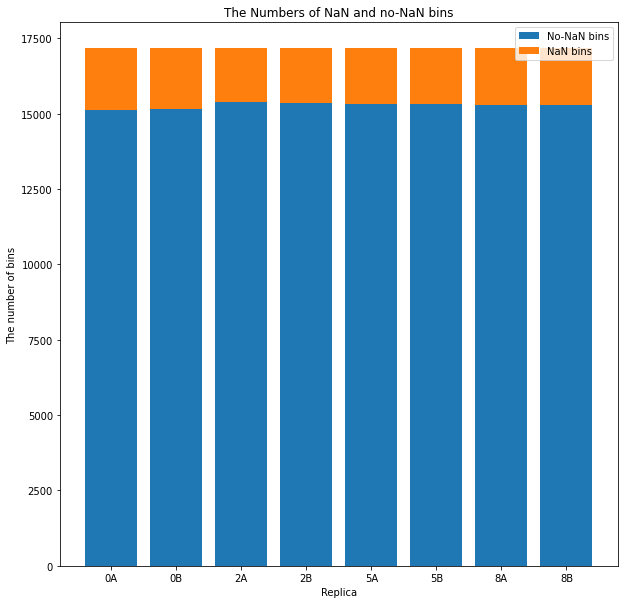

In [123]:
width = 0.8
default_len = all_contacts_balanced.shape[1]
num_of_bins = [saved_indices[i].shape[0] for i in range(len(labels))]
num_of_bins = np.array(num_of_bins)

fig, ax = plt.subplots(figsize = (10, 10))
ax.bar(labels, num_of_bins, width,  label='No-NaN bins')
ax.bar(labels, default_len - num_of_bins, width, bottom=num_of_bins, label='NaN bins')

ax.set_title('The Numbers of NaN and no-NaN bins')
ax.legend()
ax.set_ylabel('The number of bins')
ax.set_xlabel('Replica')
plt.show()


The number of skipped NaN bins does not differ significantly for 5A, probably that is not the reason for such difference.

### Homology Lifetime Distributions

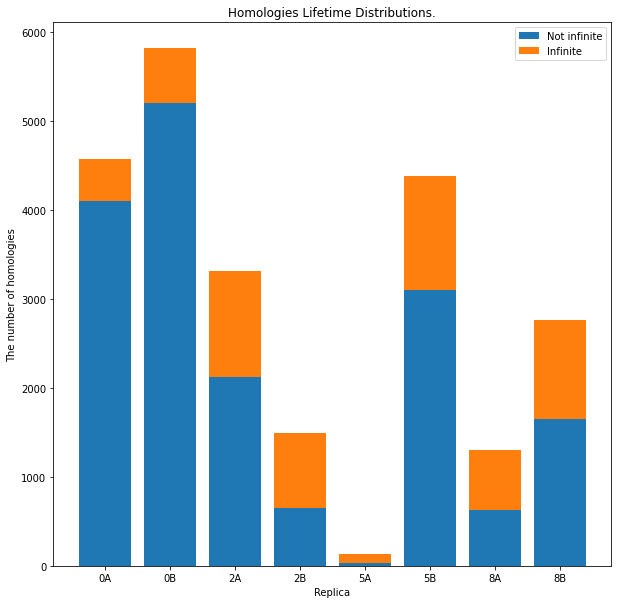

In [8]:
fig, ax = plt.subplots(figsize = (10, 10))
not_infinite = results.loc[results['Lifetime'] != float("inf"), ['Replica','Lifetime']].groupby('Replica')['Lifetime'].apply(list).str.len()
infinite = results.loc[results['Lifetime'] == float("inf"), ['Replica','Lifetime']].groupby('Replica')['Lifetime'].apply(list).str.len()
ax.bar(labels, not_infinite, width,  label='Not infinite')
ax.bar(labels, infinite, width, bottom=not_infinite, label='Infinite')

ax.set_title('Homologies Lifetime Distributions.')
ax.set_ylabel('The number of homologies')
ax.set_xlabel('Replica')
ax.legend()

plt.show()


In [9]:
print(not_infinite / infinite)

Replica
0A    8.584906
0B    8.453659
2A    1.779832
2B    0.758539
5A    0.382979
5B    2.431711
8A    0.916300
8B    1.486023
Name: Lifetime, dtype: float64


Replicas with the higher number of found homologies tend to have more ones with non-infinite lifetime. It is still not clear, what is the reason for 5A differences. Probably non-infinite lifetimes could be investigated more thoroughly.

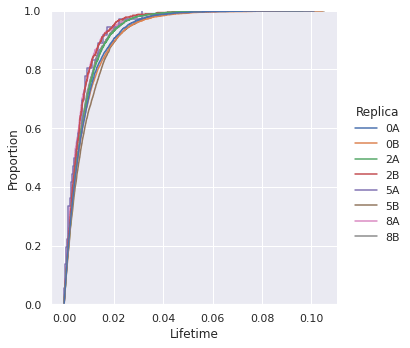

In [40]:
sns.set(rc={"figure.figsize": (20, 10)})
ax = sns.displot(data=results.loc[results['Lifetime'] != float("inf")], x='Lifetime', alpha=1, hue='Replica', kind="ecdf")
plt.show()
#a.figure(figsize=(20, 10))
#ax.set_title("The observed distribution of homology lifetymes")
#ax.set_xlabel('Lifetime')
#ax.legend(labels)

## Contact Maps visualisations

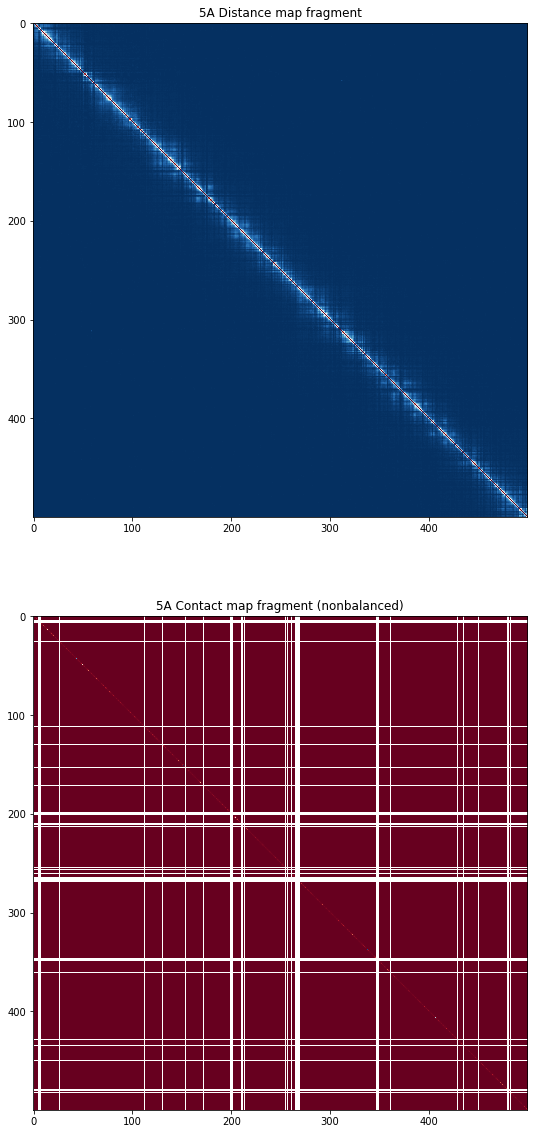

In [39]:
fig, axs = plt.subplots(2, figsize = (10, 20))
Z = np.load('NoNAN_DM_new/5A.npy')
axs[0].imshow(Z[1000:1500, 1000:1500], cmap='RdBu', interpolation='none')
axs[0].set_title('5A Distance map fragment')
c = cooler.Cooler("/gss/home/a.kuznetsov/data_new/5A_2000_down.cool")
nonbal = c.matrix(balance=False)[:, :]
bal = c.matrix(balance=True)[:, :]
axs[1].imshow(bal[1000:1500, 1000:1500], cmap='RdBu', interpolation='none')
axs[1].set_title('5A Contact map fragment (nonbalanced)')
plt.savefig('5A.png')


<ipython-input-31-962e7be1cfb2>:8: RuntimeWarning: divide by zero encountered in log
  axs[1].imshow(np.log(bal[1000:1500, 1000:1500]), cmap='RdBu', interpolation='none')


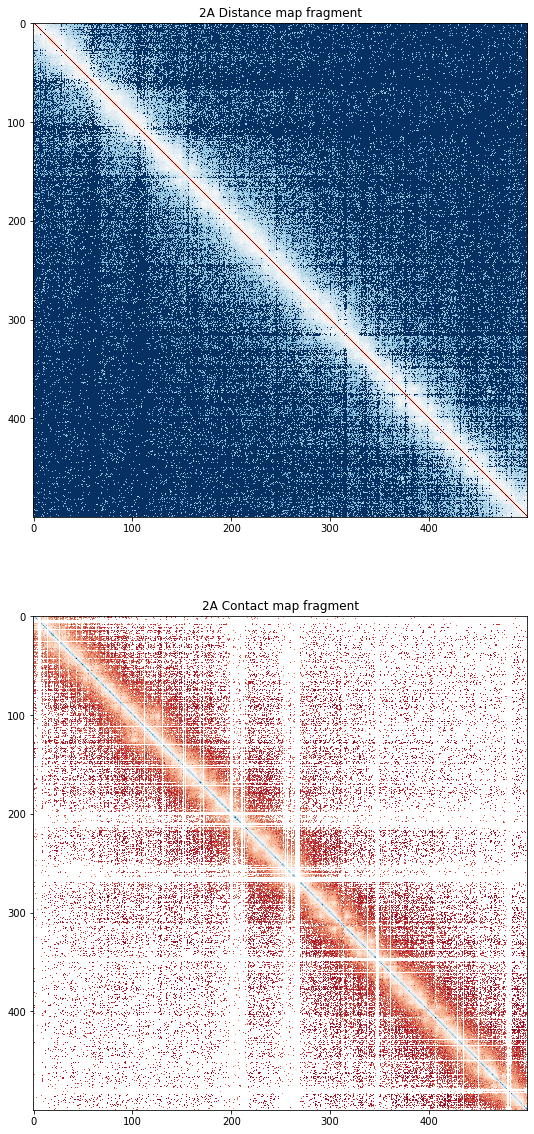

In [31]:
fig, axs = plt.subplots(2, figsize = (10, 20))
Z = np.load('NoNAN_DM_new/2A.npy')
axs[0].imshow(Z[1000:1500, 1000:1500], cmap='RdBu', interpolation='none')
axs[0].set_title('2A Distance map fragment')
c = cooler.Cooler("/gss/home/a.kuznetsov/data_new/2A_2000_down.cool")
nonbal = c.matrix(balance=False)[:, :]
bal = c.matrix(balance=True)[:, :]
axs[1].imshow(np.log(bal[1000:1500, 1000:1500]), cmap='RdBu', interpolation='none')
axs[1].set_title('2A Contact map fragment')
plt.savefig('2A.png')

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

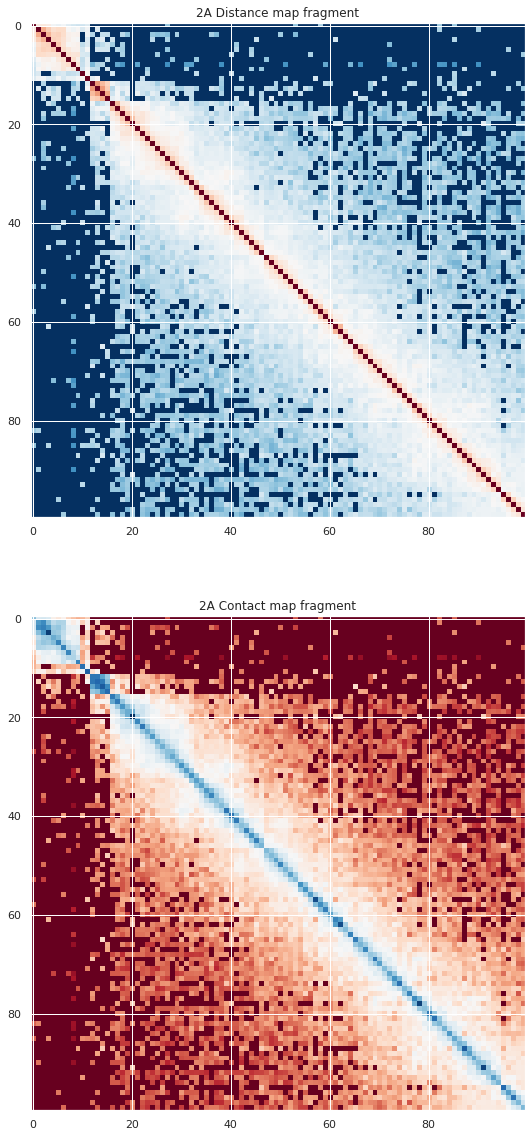

In [45]:
fig, axs = plt.subplots(2, figsize = (10, 20))
Z = all_distances[2]
axs[0].imshow(Z[:100, :100], cmap='RdBu', interpolation='none')
axs[0].set_title('2A Distance map fragment')
axs[1].imshow(np.log(all_contacts_balanced[2, saved_indices[2]][:, saved_indices[2]]+10**(-4))[:100, :100], cmap='RdBu', interpolation='none')
axs[1].set_title('2A Contact map fragment')
plt.colorbar()

Text(0.5, 1.0, '5A Contact map fragment')

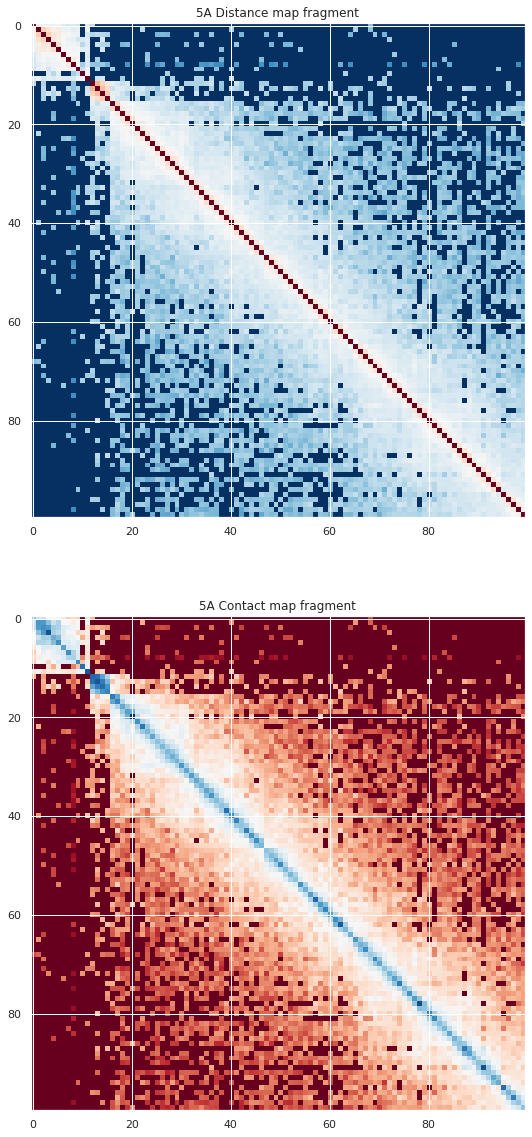

In [46]:
fig, axs = plt.subplots(2, figsize = (10, 20))
Z = all_distances[4]
axs[0].imshow(Z[:100, :100], cmap='RdBu', interpolation='none')
axs[0].set_title('5A Distance map fragment')
axs[1].imshow(np.log(all_contacts_balanced[4, saved_indices[4]][:, saved_indices[4]]+10**(-4))[:100, :100], cmap='RdBu', interpolation='none')
axs[1].set_title('5A Contact map fragment')

### Scaling Plot

In [32]:
Diag_means= np.zeros(np.shape(all_contacts_balanced)[:2]) 
for j in range(Diag_means.shape[0]):
    for i in range(Diag_means.shape[1]):
        K = np.diag(all_contacts_balanced[j], k=i)
        Diag_means[j, i] = np.nanmean(K)
Diag_means

<ipython-input-32-a498433f0e9b>:5: RuntimeWarning: Mean of empty slice
  Diag_means[j, i] = np.nanmean(K)


array([[0.22165709, 0.0867136 , 0.03725931, ...,        nan,        nan,
               nan],
       [0.17202371, 0.06892339, 0.03055269, ...,        nan,        nan,
               nan],
       [0.57661364, 0.11692308, 0.03034183, ...,        nan,        nan,
               nan],
       ...,
       [0.65071802, 0.13971119, 0.03891983, ...,        nan,        nan,
               nan],
       [0.41399063, 0.10794923, 0.03967021, ...,        nan,        nan,
               nan],
       [0.42084213, 0.11412137, 0.04153224, ...,        nan,        nan,
               nan]])

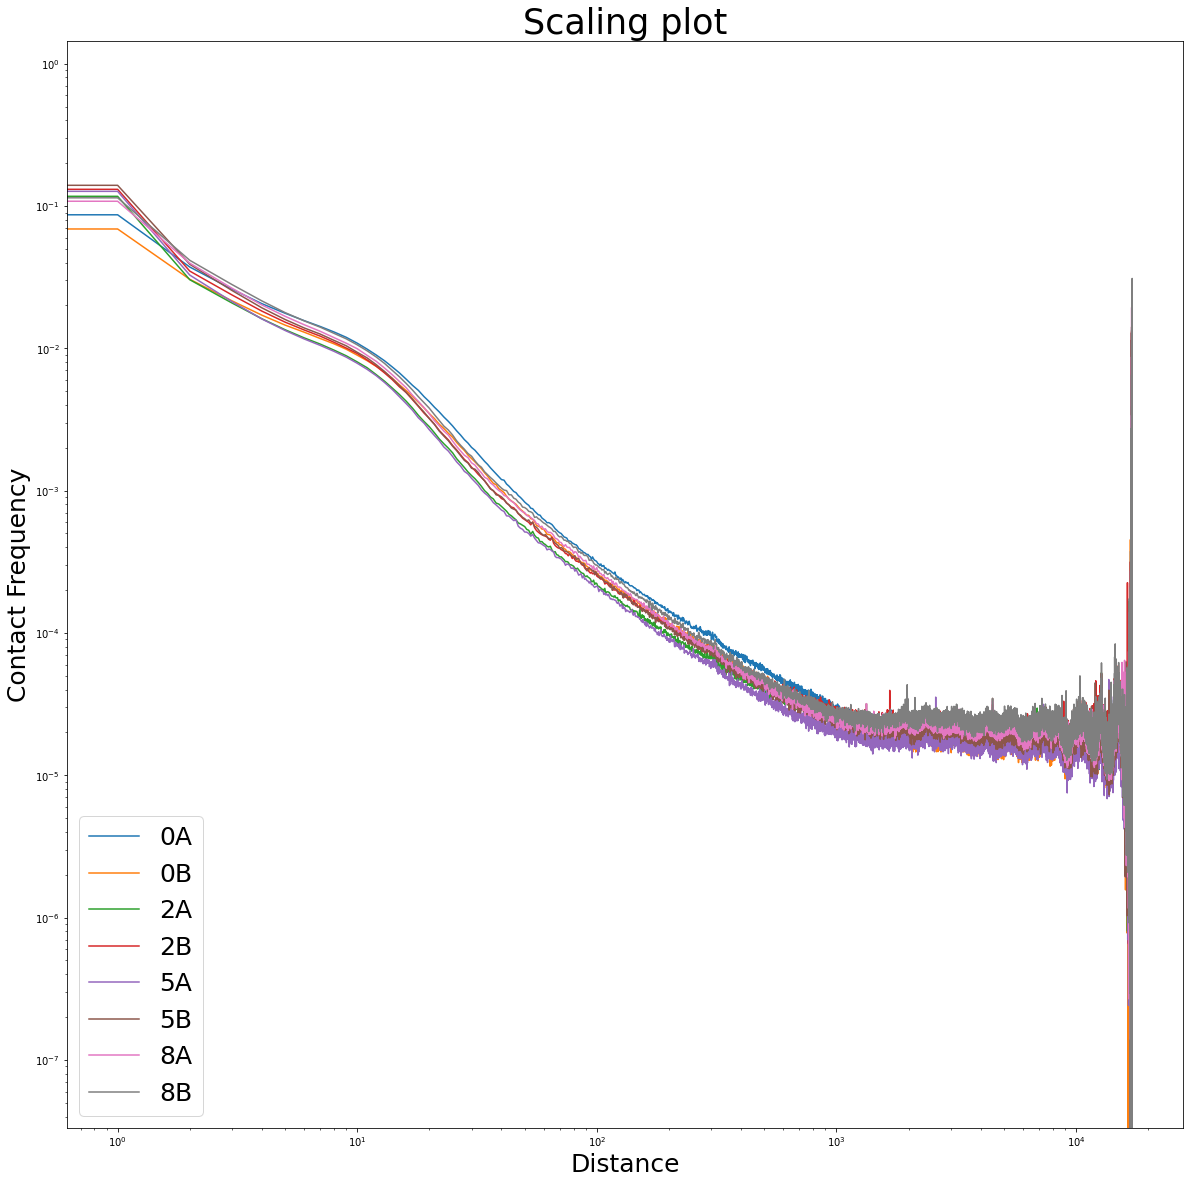

In [39]:
plt.figure(figsize = (20, 20))
for i in range(len(labels)):
    plt.plot(Diag_means[i], label=labels[i])
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=25)
plt.title('Scaling plot', fontsize=35)
#matplotlib.rc('xtick', labelsize=25) 
#matplotlib.rc('ytick', labelsize=25)
plt.xlabel('Genomic Distance', fontsize=25)
plt.ylabel('Contact Frequency', fontsize=25)
plt.savefig('Scaling plot.png')

### Contact probability distributions:

In [17]:
for i in range(len(labels)):
    A = all_contacts_balanced[i, saved_indices[i]][:, saved_indices[i]]
    print(labels[i], scipy.stats.describe(A[~np.eye(A.shape[0],dtype=bool)].reshape(A.shape[0],-1).flatten()))

0A DescribeResult(nobs=228659762, minmax=(0.0, 2.9375529810119647), mean=7.48921212882426e-05, variance=1.986078342692348e-06, skewness=259.9319947925059, kurtosis=354979.93810080277)
0B DescribeResult(nobs=229446756, minmax=(0.0, 1.7327375926075004), mean=6.163599368873719e-05, variance=1.223404174619472e-06, skewness=162.3553204149086, kurtosis=146019.19636004587)
2A DescribeResult(nobs=236713610, minmax=(0.0, 2.4821779959482755), mean=6.559821582306626e-05, variance=3.1486047705963933e-06, skewness=247.3016762988682, kurtosis=177824.73410748548)
2B DescribeResult(nobs=236067860, minmax=(0.0, 3.625146346141208), mean=7.378970614545296e-05, variance=3.874205338093798e-06, skewness=254.89229203170876, kurtosis=225974.77095107152)
5A DescribeResult(nobs=235085556, minmax=(0.0, 3.5704789411277367), mean=6.349984544228906e-05, variance=3.5764882178497916e-06, skewness=300.288301845608, kurtosis=319707.817917961)
5B DescribeResult(nobs=234411410, minmax=(0.0, 5.3421909617301475), mean=7.44

In [21]:
for i in range(len(labels)):
    A = all_contacts_balanced[i, saved_indices[i]][:, saved_indices[i]]
    print(labels[i], A[~np.eye(A.shape[0],dtype=bool)].sum())

0A 17124.81462944469
0B 14142.178804717221
2A 15527.990477037138
2B 17419.37801978593
5A 14927.89647171459
5B 17455.20413192421
8A 17269.729828299478
8B 18613.215590886815


In [27]:
all_contacts_nonbalanced[4].sum()

44853177.0

## Bin index to genome coordinates

In [15]:
clr = cooler.Cooler("/gss/home/a.kuznetsov/data_new/0A_2000_down.cool")
clr.chromsizes

name
chr1     4923596
chr2     8484197
chr3     6357299
chr4     5450249
chr5     5125352
chr6     3602379
chrM       55564
chrR       85150
chr2F     161967
chr3F      16660
chrBF      75732
Name: length, dtype: int32

In [16]:
dicty = clr.chromsizes

In [17]:
def bin_to_coor (bin_num, scale_factor = 2000, organism=dicty):
    k = 0
    for i in range(organism.shape[0]):
        if (bin_num - k)* scale_factor > clr.chromsizes[i]:
            k += np.ceil(clr.chromsizes[i] / scale_factor)
            out = 'error'
        else:
            m = bin_num  - k
            if (m + 1) * scale_factor <= clr.chromsizes[i]:
                out = (clr.chromnames[i], int(m * scale_factor), int((m + 1) * scale_factor) )
            else:
                out = (clr.chromnames[i], int(m * scale_factor), clr.chromsizes[i])
            break
    return out

### The expected output would look like in the ex.: 0 → (chr1, 0, 2000)

In [30]:
dicty.shape[0]

11

In [31]:
all_contacts_balanced.shape

(8, 17174, 17174)

In [32]:
bin_to_coor (0)

('chr1', 0, 2000)

In [33]:
bin_to_coor (17173)

('chrBF', 74000, 75732)

In [34]:
bin_to_coor (17174)

'error'

### Distance Map bin to contact map bin:

In [18]:
def dist_to_cont_bin (replica_num, bin):
    if len(saved_indices) > replica_num:
        if len(saved_indices[replica_num]) > bin:
            return saved_indices[replica_num][bin]
        else: return "There's no bin with the number %s in the replica." %bin
    else: return"There's no replica with the number %s." %replica_num

In [19]:
print(dist_to_cont_bin (0, 0))
print(dist_to_cont_bin (8, 0))
print(dist_to_cont_bin (0, 15122))

NameError: name 'saved_indices' is not defined

In [21]:
bin_to_coor (dist_to_cont_bin(1, 15097))

('chr2F', 100000, 102000)

In [13]:
L = [pd.read_csv('/gss/home/a.kuznetsov/results_new_check/'+name+'.csv') for name in ['0A']]
results_check = pd.concat(L, ignore_index=True)
results_check

,Replica,Class,Dim,Birth,Death,Lifetime,Numvert,Range,Vertices,Unsorted_Vertices
0,0A,1,1,0.370315,0.383337,0.013022,4,3,"[15079, 15080, 15081, 15082]","[15081, 15080, 15082, 15081, 15080, 15079, 150..."
1,0A,2,1,0.377576,0.378836,0.001260,5,4,"[3, 4, 5, 6, 7]","[4, 3, 7, 6, 4, 5, 6, 5, 7, 3]"
2,0A,3,1,0.402621,0.408635,0.006014,5,17,"[15074, 15075, 15076, 15090, 15091]","[15074, 15075, 15076, 15090, 15091, 15074, 150..."
3,0A,4,1,0.403247,0.409847,0.006600,5,4,"[11116, 11117, 11118, 11119, 11120]","[11117, 11116, 11119, 11120, 11118, 11119, 111..."
4,0A,5,1,0.404651,0.407927,0.003276,4,3,"[2392, 2393, 2394, 2395]","[2392, 2393, 2394, 2395, 2393, 2395, 2392, 2394]"
...,...,...,...,...,...,...,...,...,...,...
4567,0A,842,2,0.485841,inf,inf,7,9,"[3203, 3204, 3206, 3208, 3210, 3211, 3212]","[3210, 3206, 3203, 3210, 3211, 3212, 3204, 320..."
4568,0A,843,2,0.485696,inf,inf,11,11,"[13076, 13078, 13079, 13080, 13081, 13082, 130...","[13086, 13078, 13087, 13085, 13080, 13087, 130..."
4569,0A,844,2,0.485434,inf,inf,11,12,"[11864, 11865, 11866, 11867, 11868, 11871, 118...","[11871, 11876, 11864, 11867, 11871, 11864, 118..."
4570,0A,845,2,0.482628,inf,inf,7,10,"[12089, 12090, 12092, 12093, 12096, 12098, 12099]","[12092, 12098, 12089, 12092, 12090, 12089, 120..."


In [14]:
all_distances[0][[15078, 15079, 15080, 15081]] [:,[15078, 15079, 15080, 15081]]

array([[0.        , 0.35865242, 0.38941581, 0.37031541],
       [0.35865242, 0.        , 0.32974535, 0.38333743],
       [0.38941581, 0.32974535, 0.        , 0.36773257],
       [0.37031541, 0.38333743, 0.36773257, 0.        ]])

In [15]:
results_check['Unsorted_Vertices'][0]

'[15081, 15080, 15082, 15081, 15080, 15079, 15082, 15079]'

# Hand Labeled Loops

In [47]:
import os
handy = pd.concat(list(map(lambda name: pd.read_csv('/gss/home/a.kuznetsov/loops_old/'+name, delimiter='\t'), os.listdir('loops_old'))), ignore_index=True)
handy

,chr5,8000,10000,28000,30000,chr1,214000,216000,226000,228000
0,chr5,30000.0,32000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr5,44000.0,46000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr5,64000.0,66000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr5,82000.0,84000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr5,164000.0,166000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1257,NaN,NaN,NaN,NaN,NaN,chr6,NaN,NaN,3218000.0,3220000.0
1258,NaN,NaN,NaN,NaN,NaN,chr6,NaN,NaN,3228000.0,3230000.0
1259,NaN,NaN,NaN,NaN,NaN,chr6,NaN,NaN,3520000.0,3522000.0
1260,NaN,NaN,NaN,NaN,NaN,chr6,NaN,NaN,3534000.0,3536000.0


In [46]:
pd.read_csv('/gss/home/a.kuznetsov/loops_old/loops_1_6_left.bed', delimiter='\t'),

(     chr1   214000   216000
 0    chr1   228000   230000
 1    chr1   352000   354000
 2    chr1   374000   376000
 3    chr1   388000   390000
 4    chr1   402000   404000
 ..    ...      ...      ...
 431  chr6  3208000  3210000
 432  chr6  3222000  3224000
 433  chr6  3506000  3508000
 434  chr6  3522000  3524000
 435  chr6  3538000  3540000
 
 [436 rows x 3 columns],)

In [45]:
pd.read_csv?

In [41]:
loops = loops.sort_values('Lifetime', ascending=False)

In [43]:
loops.head(20)

,Replica,Class,Dim,Birth,Death,Lifetime,Numvert,Range,Vertices,Unsorted_Vertices
1097,0B,210,1,0.346099,0.523912,0.177813,24,27,"[15055, 15057, 15058, 15060, 15061, 15062, 150...","[15055, 15082, 15058, 15057, 15078, 15079, 150..."
223,0A,224,1,0.375227,0.538950,0.163723,24,27,"[15029, 15031, 15032, 15034, 15035, 15036, 150...","[15045, 15046, 15044, 15043, 15056, 15055, 150..."
6979,8A,331,1,0.721337,0.860061,0.138724,10,9,"[5614, 5615, 5616, 5617, 5618, 5619, 5620, 562...","[5619, 5620, 5615, 5614, 5618, 5619, 5621, 562..."
1290,0B,403,1,0.676847,0.815442,0.138595,14,14,"[1124, 1125, 1127, 1128, 1129, 1130, 1131, 113...","[1128, 1129, 1130, 1129, 1133, 1132, 1134, 113..."
8101,8B,366,1,0.728293,0.864989,0.136695,10,9,"[5607, 5608, 5609, 5610, 5611, 5612, 5613, 561...","[5612, 5613, 5608, 5607, 5611, 5612, 5614, 561..."
356,0A,357,1,0.674233,0.804722,0.130490,7,7,"[7192, 7194, 7195, 7196, 7197, 7198, 7199]","[7195, 7194, 7198, 7199, 7196, 7195, 7197, 719..."
1388,0B,501,1,0.698184,0.827856,0.129672,23,27,"[5382, 5383, 5385, 5386, 5387, 5388, 5389, 539...","[5393, 5392, 5397, 5398, 5396, 5397, 5404, 540..."
1759,0B,872,1,0.775660,0.900000,0.124340,39,43,"[14321, 14322, 14323, 14324, 14328, 14329, 143...","[14332, 14333, 14340, 14341, 14356, 14357, 143..."
4348,2B,1290,1,0.775702,0.900000,0.124298,10,11,"[8188, 8190, 8191, 8192, 8193, 8194, 8195, 819...","[8198, 8197, 8191, 8192, 8193, 8194, 8198, 819..."
2088,2A,313,1,0.717994,0.841173,0.123179,6,5,"[15275, 15276, 15277, 15278, 15279, 15280]","[15276, 15275, 15279, 15280, 15277, 15276, 152..."
